In [2]:
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

import torch
import torch.nn as nn
from models import LSTNet
import importlib

from utils import *;
import Optim

#显示中文
plt.rcParams['font.sans-serif'] = [u'SimHei']
plt.rcParams['axes.unicode_minus'] = False

data_path='D:/Codes/nCov/LSTNet-master/data/'

In [11]:
fin=open('data/data_zhejiang.txt')
rawdat=np.loadtxt(fin,delimiter=',');
print(rawdat)
scale=np.ones(3)
dat=np.zeros(rawdat.shape)
for i in range(3):
    scale[i] = np.max(np.abs(rawdat[:,i]));
    if(scale[i]==0):
        scale[i]=1
    dat[:,i] = rawdat[:,i] / scale[i];
print(dat)

[[  0.   1.  43.]
 [  0.   0.  19.]
 [  0.   0.  42.]
 [  0.   0.  24.]
 [  0.   2.  45.]
 [  0.   0. 123.]
 [  0.   1. 132.]
 [  0.  10. 110.]
 [  0.   7.  61.]
 [  0.  11.  62.]
 [  0.  11.  63.]
 [  0.  19. 105.]
 [  0.  16.  66.]
 [  0.  16.  59.]
 [  0.  29.  52.]
 [  0.  52.  42.]
 [  0.  26.  27.]
 [  0.  41.  17.]
 [  0.  28.  25.]
 [  0.  51.  14.]
 [  0.  39.  14.]
 [  0.  43.  10.]
 [  0.  25.   7.]
 [  0.  28.   5.]
 [  0.  51.   4.]
 [  0.  28.   1.]]
[[0.         0.01923077 0.32575758]
 [0.         0.         0.14393939]
 [0.         0.         0.31818182]
 [0.         0.         0.18181818]
 [0.         0.03846154 0.34090909]
 [0.         0.         0.93181818]
 [0.         0.01923077 1.        ]
 [0.         0.19230769 0.83333333]
 [0.         0.13461538 0.46212121]
 [0.         0.21153846 0.46969697]
 [0.         0.21153846 0.47727273]
 [0.         0.36538462 0.79545455]
 [0.         0.30769231 0.5       ]
 [0.         0.30769231 0.4469697 ]
 [0.         0.55769231 0.3

In [7]:
inputfile="D:/Codes/nCov/data/out_increase_province_2.26.csv"

# 显示所有列
pd.set_option('display.max_columns', None)
# 显示所有行
pd.set_option('display.max_rows', None)
# 设置value的显示长度为100，默认为50
pd.set_option('max_colwidth', 200)

#读取数据
dataf = pd.read_csv(inputfile, encoding='UTF-8')

In [8]:
#提取对应省份的数据
data_zhejiang=dataf.loc[dataf['省']=='浙江省'].iloc[:,1:4]
print(data_zhejiang)
#对数据进行处理，将数据中的负数消除
for index,data in data_zhejiang.iterrows():
    for name in data.iteritems():
        if name[1]<0:
            # data_zhejiang.loc[index+1,name[0]]+=name[1]
            data_zhejiang.loc[index,name[0]]=0
data_zj=data_zhejiang.iloc[::-1]
data_zj.to_csv(data_path+'data_zhejiang_2.26.txt', header=0,index=False)

     新增死亡  新增治愈   新增确诊
306   0.0  59.0    0.0
307   0.0  26.0    0.0
308   0.0  22.0    0.0
309   0.0  41.0    0.0
310   0.0  40.0    2.0
311   0.0  46.0   28.0
312   1.0  29.0    1.0
313   0.0  69.0    2.0
314   0.0  28.0    1.0
315   0.0  51.0    4.0
316   0.0  28.0    5.0
317   0.0  25.0    7.0
318   0.0  43.0   10.0
319   0.0  39.0   14.0
320   0.0  51.0   14.0
321   0.0  28.0   25.0
322   0.0  41.0   17.0
323   0.0  26.0   27.0
324   0.0  52.0   42.0
325   0.0  29.0   52.0
326   0.0  16.0   59.0
327   0.0  16.0   66.0
328   0.0  19.0  105.0
329  -1.0  11.0   63.0
330   1.0  11.0   62.0
331   0.0   7.0   61.0
332   0.0  10.0  110.0
333   0.0   1.0  132.0
334   0.0   0.0  123.0
335   0.0   2.0   45.0
336   0.0   0.0   24.0
337   0.0   0.0   42.0
338   0.0   0.0   19.0
339   0.0   1.0   43.0


In [9]:
#提取对应省份的数据
data_hb=dataf.loc[dataf['省']=='湖北省'].iloc[:,1:4]
print(data_hb)
# data_hb.iloc[5,2]=(data_hb.iloc[4,2]+data_hb.iloc[6,2])/2
#对数据进行处理，将数据中的负数消除
for index,data in data_hb.iterrows():
    for name in data.iteritems():
        if name[1]<0:
            # data_hb.loc[index+1,name[0]]+=name[1]
            data_hb.loc[index,name[0]]=0
data_hb=data_hb.iloc[::-1]
data_hb.to_csv(data_path+'data_hubei_2.26.txt', header=0,index=False)

     新增死亡    新增治愈     新增确诊
0    52.0  1986.0    401.0
1    68.0  2223.0    499.0
2   149.0  1405.0    203.0
3    96.0  1653.0    630.0
4   106.0  1809.0    792.0
5   115.0  1360.0    631.0
6   108.0  1185.0    349.0
7   132.0  1393.0   1693.0
8    93.0  1250.0   1807.0
9   100.0  1027.0   1933.0
10  139.0   845.0   1843.0
11   31.0   690.0   2420.0
12  116.0   672.0   3780.0
13  242.0   773.0  14840.0
14   94.0   376.0   1638.0
15  103.0   456.0   2097.0
16   91.0   374.0   2531.0
17   81.0   262.0   2147.0
18   81.0   351.0   2841.0
19   69.0   155.0   2447.0
20   70.0   175.0   2987.0
21   65.0   139.0   3156.0
22   64.0    98.0   2345.0
23   56.0    33.0   2103.0
24   45.0    99.0   1921.0
25   45.0    27.0   1347.0
26   42.0    51.0    903.0
27   37.0     3.0   1349.0
28   25.0    35.0    840.0
29   24.0     5.0   1291.0
30   24.0     5.0    365.0
31   13.0    10.0    328.0
32   15.0     1.0    181.0
33   24.0    31.0    549.0


     新增死亡  新增治愈   新增确诊
519   0.0   1.0   43.0
518   0.0   0.0   19.0
517   0.0   0.0   42.0
516   0.0   0.0   24.0
515   0.0   2.0   45.0
514   0.0   0.0  123.0
513   0.0   1.0  132.0
512   0.0  10.0  110.0
511   0.0   7.0   61.0
510   0.0  11.0   62.0
509   0.0  11.0   63.0
508   0.0  19.0  105.0
507   0.0  16.0   66.0
506   0.0  16.0   59.0
505   0.0  29.0   52.0
504   0.0  52.0   42.0
503   0.0  26.0   27.0
502   0.0  41.0   17.0
501   0.0  28.0   25.0
500   0.0  51.0   14.0
499   0.0  39.0   14.0
498   0.0  43.0   10.0
497   0.0  25.0    7.0
496   0.0  28.0    5.0
495   0.0  51.0    4.0
494   0.0   7.0    1.0


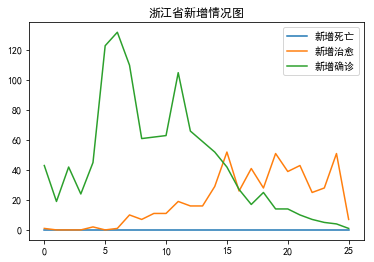

In [8]:
print(data_zj)
data_zj.plot(title='浙江省新增情况图',use_index=False)
plt.savefig('figure/zhejiang.png',dpi=500)
plt.show()

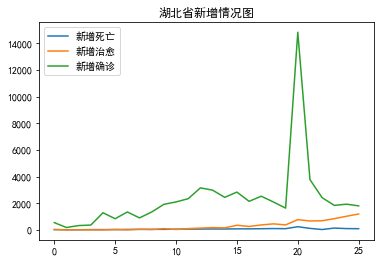

In [9]:
data_hb.plot(title='湖北省新增情况图',use_index=False)
plt.savefig('figure/hubei.png',dpi=500)
plt.show()

In [54]:
#读取模型
with open('save/zhejiang.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table('data/data_zhejiang_2.26.txt',header=None,sep=',')
data_zj=data_zj[::-1]
print(data_zj)

      0     1      2
33  0.0  59.0    0.0
32  0.0  26.0    0.0
31  0.0  22.0    0.0
30  0.0  41.0    0.0
29  0.0  40.0    2.0
28  0.0  46.0   28.0
27  1.0  29.0    1.0
26  0.0  69.0    2.0
25  0.0  28.0    1.0
24  0.0  51.0    4.0
23  0.0  28.0    5.0
22  0.0  25.0    7.0
21  0.0  43.0   10.0
20  0.0  39.0   14.0
19  0.0  51.0   14.0
18  0.0  28.0   25.0
17  0.0  41.0   17.0
16  0.0  26.0   27.0
15  0.0  52.0   42.0
14  0.0  29.0   52.0
13  0.0  16.0   59.0
12  0.0  16.0   66.0
11  0.0  19.0  105.0
10  0.0  11.0   63.0
9   1.0  11.0   62.0
8   0.0   7.0   61.0
7   0.0  10.0  110.0
6   0.0   1.0  132.0
5   0.0   0.0  123.0
4   0.0   2.0   45.0
3   0.0   0.0   24.0
2   0.0   0.0   42.0
1   0.0   0.0   19.0
0   0.0   1.0   43.0


      0     1     2
28  0.0  46.0  28.0
27  1.0  29.0   1.0
26  0.0  69.0   2.0
25  0.0  28.0   1.0
24  0.0  51.0   4.0


In [55]:
i=0
dt=data_zj.iloc[5:10,:]
dt=dt[::-1]
#预测的前5个值
first_5=dt
dt=dt.values
dt=np.expand_dims(dt,axis=0)
print(dt)
x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_5=pd.DataFrame(y)

[[[ 0. 51.  4.]
  [ 0. 28.  1.]
  [ 0. 69.  2.]
  [ 1. 29.  1.]
  [ 0. 46. 28.]]]


RuntimeError: shape '[-1, 1, 7, 3]' is invalid for input of size 15

In [56]:
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(4):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_5=later_5.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)

RuntimeError: shape '[-1, 1, 7, 3]' is invalid for input of size 15

In [58]:
predict_10=first_5.append(later_5).reset_index(drop=True)
print(predict_10)

          0          1          2
0  0.000000  51.000000   4.000000
1  0.000000  28.000000   1.000000
2  0.000000  69.000000   2.000000
3  1.000000  29.000000   1.000000
4  0.000000  46.000000  28.000000
5  0.058280  33.094639   6.452974
6 -0.154257  32.226162  13.061096
7 -0.344203  26.102453  10.647651
8 -0.558568  24.941467   9.514442
9 -0.661092  20.453184   7.160180


In [59]:
#读取真实值
# data_true=pd.read_table('data/data_zhejiang_2.20.txt',header=None,sep=',')
data_true=data_zj.iloc[:10,:].reset_index(drop=True)
data_true=data_true[::-1]
print(data_true)

     0     1     2
9  0.0  51.0   4.0
8  0.0  28.0   1.0
7  0.0  69.0   2.0
6  1.0  29.0   1.0
5  0.0  46.0  28.0
4  0.0  40.0   2.0
3  0.0  41.0   0.0
2  0.0  22.0   0.0
1  0.0  26.0   0.0
0  0.0  59.0   0.0


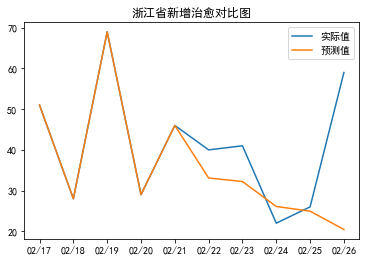

In [60]:
import matplotlib.dates as mdate

#显示新增治愈图像
plt.plot(pd.date_range('2020-2-17','2020-2-26',freq='1d'),data_true.iloc[:,1],label='实际值')
plt.plot(pd.date_range('2020-2-17','2020-2-26',freq='1d'),predict_10.iloc[:,1],label='预测值')
plt.legend()
ax = plt.gca() 
ax.xaxis.set_major_formatter(mdate.DateFormatter('%m/%d')) 
plt.title('浙江省新增治愈对比图')
plt.savefig('figure/浙江省新增治愈对比图_LSTnet.png',dpi=500)

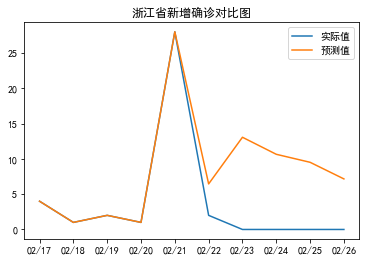

In [61]:
ax = plt.gca() 
ax.xaxis.set_major_formatter(mdate.DateFormatter('%m/%d')) 
plt.plot(pd.date_range('2020-2-17','2020-2-26',freq='1d'),data_true.iloc[:,2],label='实际值')
plt.plot(pd.date_range('2020-2-17','2020-2-26',freq='1d'),predict_10.iloc[:,2],label='预测值')
plt.legend()
plt.title('浙江省新增确诊对比图')
plt.savefig('figure/浙江省新增确诊对比图_LSTnet.png',dpi=500)

In [88]:
#下面的代码对四种模型进行总结
data_path='allsum_data/quezhen_zhejiang_2.26.txt'

In [ ]:
#对非湖北省数据进行预测

#读取模型
with open('save3/nohubei_ARmodel.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table(data_path,header=None,sep=',')

dt=data_zj.iloc[-14:-7,:]
#预测的前5个值
first_7=dt
print(first_7)
dt=dt.values
dt=np.expand_dims(dt,axis=0)
# print(first_7)

x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
# print(y)
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_7=pd.DataFrame(y)
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(6):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_7=later_7.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)
preditc_ARmodel=first_7.append(later_7).reset_index(drop=True)
print(preditc_ARmodel)

In [ ]:
with open('save3/nohubei_LSTNet.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table(data_path,header=None,sep=',')

dt=data_zj.iloc[-14:-7,:]
#预测的前5个值
first_7=dt
dt=dt.values
dt=np.expand_dims(dt,axis=0)

x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_7=pd.DataFrame(y)
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(6):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_7=later_7.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)
preditc_LSTNet=first_7.append(later_7).reset_index(drop=True)
print(preditc_LSTNet)

In [ ]:
from math import log 
#计算α值，截止到2.20日
#并同时计算α的中位数和平均值
data_zj=pd.read_table(data_path,header=None,sep=',')
data_hubei=data_zj
alpha=[]
alpha_median=[]
alpha_mean=[]
for i in range(len(data_hubei)-2):
    up=log(data_hubei.iloc[2+i]/data_hubei.iloc[2+i-1])
    below=log(data_hubei.iloc[2+i-1]/data_hubei.iloc[2+i-2])
    if below==0:
        up=1;below=1
    alpha.append(up/below)
    alpha_median.append(np.median(alpha))
    alpha_mean.append(np.mean(alpha))

hubei_predict=data_hubei[-14:]
print(hubei_predict)
alpha_select=alpha_median[-1]
start=7
for i in range(len(hubei_predict)-start):
    hubei_predict.iloc[start+i]=int(pow(hubei_predict.iloc[start+i-1]/hubei_predict.iloc[start+i-2],alpha_select)*hubei_predict.iloc[start+i-1])
preditc_alpha=hubei_predict

In [ ]:
with open('save3/nohubei_LSTnet_alpha.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table(data_path,header=None,sep=',')

dt=data_zj.iloc[-14:-7,:]
#预测的前5个值
first_7=dt
dt=dt.values
dt=np.expand_dims(dt,axis=0)

x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
print(y)
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_7=pd.DataFrame(y)
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(6):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_7=later_7.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)
preditc_LSTnet_alpha=first_7.append(later_7).reset_index(drop=True)
print(preditc_LSTnet_alpha)

In [101]:
print(preditc_ARmodel)

              0
0   1145.000000
1   1155.000000
2   1162.000000
3   1167.000000
4   1171.000000
5   1172.000000
6   1174.000000
7   1308.895020
8   1291.346191
9   1277.035889
10  1330.394409
11  1388.371338
12  1401.608154
13  1418.793823


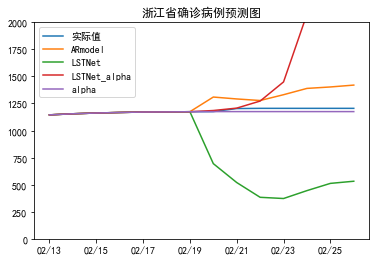

In [103]:
import matplotlib.dates as mdate

#显示新增治愈图像
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),data_zj.iloc[-14:,:],label='实际值')
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_ARmodel,label='ARmodel')
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_LSTNet,label='LSTNet')
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_LSTnet_alpha,label='LSTNet_alpha')
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_alpha,label='alpha')
plt.legend()
ax = plt.gca() 
ax.xaxis.set_major_formatter(mdate.DateFormatter('%m/%d')) 
# plt.show()
plt.ylim((0, 2000))
plt.title('浙江省确诊病例预测图')
plt.savefig('figure3/浙江省确诊病例.png',dpi=500)

In [54]:
#对湖北省数据进行预测

#读取模型
with open('save3/hubei_ARmodel.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table('allsum_data/quezhen_hubei_2.26.txt',header=None,sep=',')

dt=data_zj.iloc[-14:-7,:]
#预测的前5个值
first_7=dt
print(first_7)
dt=dt.values
dt=np.expand_dims(dt,axis=0)
# print(first_7)

x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
# print(y)
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_7=pd.DataFrame(y)
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(6):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_7=later_7.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)
preditc_ARmodel=first_7.append(later_7).reset_index(drop=True)
print(preditc_ARmodel)

          0
20  48206.0
21  51986.0
22  54406.0
23  56249.0
24  58182.0
25  59989.0
26  61682.0
               0
0   48206.000000
1   51986.000000
2   54406.000000
3   56249.000000
4   58182.000000
5   59989.000000
6   61682.000000
7   66253.203125
8   68469.093750
9   70310.757812
10  73415.062500
11  77017.929688
12  79948.937500
13  82873.906250


In [ ]:
from math import log 
#计算α值，截止到2.20日
#并同时计算α的中位数和平均值
data_zj=pd.read_table('allsum_data/quezhen_nohubei_2.26.txt',header=None,sep=',')
data_hubei=data_zj
alpha=[]
alpha_median=[]
alpha_mean=[]
for i in range(len(data_hubei)-2):
    up=log(data_hubei.iloc[2+i]/data_hubei.iloc[2+i-1])
    below=log(data_hubei.iloc[2+i-1]/data_hubei.iloc[2+i-2])
    alpha.append(up/below)
    alpha_median.append(np.median(alpha))
    alpha_mean.append(np.mean(alpha))

hubei_predict=data_hubei[-14:]
print(hubei_predict)
alpha_select=alpha_median[-1]
start=7
for i in range(len(hubei_predict)-start):
    hubei_predict.iloc[start+i]=int(pow(hubei_predict.iloc[start+i-1]/hubei_predict.iloc[start+i-2],alpha_select)*hubei_predict.iloc[start+i-1])
preditc_alpha=hubei_predict

In [55]:
with open('save3/hubei_LSTNet.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table('allsum_data/quezhen_hubei_2.26.txt',header=None,sep=',')

dt=data_zj.iloc[-14:-7,:]
#预测的前5个值
first_7=dt
dt=dt.values
dt=np.expand_dims(dt,axis=0)

x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_7=pd.DataFrame(y)
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(6):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_7=later_7.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)
preditc_LSTNet=first_7.append(later_7).reset_index(drop=True)
print(preditc_LSTNet)

               0
0   48206.000000
1   51986.000000
2   54406.000000
3   56249.000000
4   58182.000000
5   59989.000000
6   61682.000000
7   32801.886719
8   23025.695312
9   15264.486328
10  15184.677734
11  20362.759766
12  25168.718750
13  27045.318359


In [56]:
with open('save3/hubei_LSTnet_alpha.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table('allsum_data/quezhen_hubei_2.26.txt',header=None,sep=',')

dt=data_zj.iloc[-14:-7,:]
#预测的前5个值
first_7=dt
dt=dt.values
dt=np.expand_dims(dt,axis=0)

x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
print(y)
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_7=pd.DataFrame(y)
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(6):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_7=later_7.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)
preditc_LSTnet_alpha=first_7.append(later_7).reset_index(drop=True)
print(preditc_LSTnet_alpha)

[[64003.64]]
                0
0    48206.000000
1    51986.000000
2    54406.000000
3    56249.000000
4    58182.000000
5    59989.000000
6    61682.000000
7    64003.640625
8    67573.773438
9    73423.273438
10   84957.257812
11  110150.484375
12  173062.328125
13  400416.156250


In [57]:
print(preditc_ARmodel)

               0
0   48206.000000
1   51986.000000
2   54406.000000
3   56249.000000
4   58182.000000
5   59989.000000
6   61682.000000
7   66253.203125
8   68469.093750
9   70310.757812
10  73415.062500
11  77017.929688
12  79948.937500
13  82873.906250


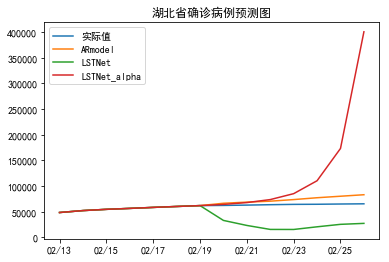

In [58]:
import matplotlib.dates as mdate

#显示新增治愈图像
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),data_zj.iloc[-14:,:],label='实际值')
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_ARmodel,label='ARmodel')
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_LSTNet,label='LSTNet')
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_LSTnet_alpha,label='LSTNet_alpha')
plt.legend()
ax = plt.gca() 
ax.xaxis.set_major_formatter(mdate.DateFormatter('%m/%d')) 
# plt.show()
plt.title('湖北省确诊病例预测图')
plt.savefig('figure3/湖北省确诊病例.png',dpi=500)

In [ ]:
#对浙江省数据进行预测

#读取模型
with open('save3/zhejiang_ARmodel.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table('allsum_data/quezhen_nohubei_2.26.txt',header=None,sep=',')

dt=data_zj.iloc[-14:-7,:]
#预测的前5个值
first_7=dt
print(first_7)
dt=dt.values
dt=np.expand_dims(dt,axis=0)
# print(first_7)

x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
# print(y)
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_7=pd.DataFrame(y)
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(6):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_7=later_7.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)
preditc_ARmodel=first_7.append(later_7).reset_index(drop=True)
print(preditc_ARmodel)

In [ ]:
with open('save3/nohubei_LSTNet.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table('allsum_data/quezhen_nohubei_2.26.txt',header=None,sep=',')

dt=data_zj.iloc[-14:-7,:]
#预测的前5个值
first_7=dt
dt=dt.values
dt=np.expand_dims(dt,axis=0)

x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_7=pd.DataFrame(y)
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(6):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_7=later_7.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)
preditc_LSTNet=first_7.append(later_7).reset_index(drop=True)
print(preditc_LSTNet)

In [ ]:
with open('save3/nohubei_LSTnet_alpha.pt', 'rb') as f:
    model = torch.load(f)
data_zj=pd.read_table('allsum_data/quezhen_nohubei_2.26.txt',header=None,sep=',')

dt=data_zj.iloc[-14:-7,:]
#预测的前5个值
first_7=dt
dt=dt.values
dt=np.expand_dims(dt,axis=0)

x=Variable(torch.FloatTensor(dt))
y=model(x).data.numpy()
print(y)
Y=np.expand_dims(y,axis=0)
#预测的后5个值
later_7=pd.DataFrame(y)
new_dt=dt[:,1:,:]
dt_1=np.concatenate((new_dt,Y),axis=1)
for i in range(6):
    x=Variable(torch.FloatTensor(dt_1))
    y=model(x).data.numpy()
    Y=np.expand_dims(y,axis=0)
    later_7=later_7.append(pd.DataFrame(y))
    dt_1=dt_1[:,1:,:]
    dt_1=np.concatenate((dt_1,Y),axis=1)
preditc_LSTnet_alpha=first_7.append(later_7).reset_index(drop=True)
print(preditc_LSTnet_alpha)

In [ ]:
print(preditc_ARmodel)

In [ ]:
import matplotlib.dates as mdate

#显示新增治愈图像
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),data_zj.iloc[-14:,:],label='实际值')
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_ARmodel,label='ARmodel')
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_LSTNet,label='LSTNet')
plt.plot(pd.date_range('2020-2-13',periods=14,freq='1d'),preditc_LSTnet_alpha,label='LSTNet_alpha')
plt.legend()
ax = plt.gca() 
ax.xaxis.set_major_formatter(mdate.DateFormatter('%m/%d')) 
# plt.show()
plt.title('非湖北省确诊病例预测图')
plt.savefig('figure3/非湖北省确诊病例.png',dpi=500)

